# **TAREA 5**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## **- EJERCICIO 1**

**ejercicio** : en data science y programación científica es común necesitar vectores con valores dentro de cierto intervalo, pero con sub-intervalos internos con diference espaciamiento ,por ejemplo:

[0.  , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.7 , 0.8 , 0.9 , 1.  ]
       
El primer sub-intervalo incrementa de 0.1 en 0.1 , el segundo de 0.01 en 0.01 , y el tercero de 0.1 en 0.1 nuevamente.

Usando unicamente NumPy crea un vector de este tipo con el nombre xs .

**nota**: no es permitido usar ciclos, debe realizarse con operaciones "vectorizadas" de numpy

In [2]:
# tu codigo aqui (~ 5 lineas de codigo):
xs = np.linspace(0,0.5,6)
xs = np.append(xs,np.linspace(0.51,0.6,10))
xs = np.append(xs,np.linspace(0.6,1,5))
xs

array([0.  , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.6 , 0.7 , 0.8 , 0.9 , 1.  ])

## **- EJERCICIO 2**

**Ejercicio (parte de tarea)** En este caso usamos un ciclo  para ejemplificar pero ya hemos mencionado que debemos evitarlos siempre que sea posible y usar operaciones "vectorizadas" ya que es mucho mas rápido al utilizar  código pre-compilado de C, en este ejercicio debemos remplazar el calculo de ys para hacerlo de manera "vectorizada" y eliminar el ciclo for. 

**tip**: usar slicing

In [3]:
# las siguientes 3 lineas generan un conjunto de datos que se comportan segun una onda senoidal pero tienen
# ruido por lo cual vamos a suavizar usando promedio de 3 puntos
# en este ejercicio los generamos manualmente pero pensemos que son datos que pudieron ser generados con algún
# instrumento como un sensor, o bien estar almacenados en una base de datos
sample_points = 10000
inicio_intervalo = 0
ruido = 0.5*np.random.randn(sample_points) #el ruido comunmente se debe a aleatoriedad o captura no exacta de info.
x = np.linspace(inicio_intervalo,5*np.pi,sample_points) 
y = np.sin(x) + ruido

#ys es "y suavizado", inicialmente es una copia de y
#ys =  y.copy()
#for n in range(1,len(y)-1): #5
#    ys[n] = (y[n-1] + y[n] + y[n+1])/3

ysuav = np.append(np.insert(y[0:-2],0,0),0)
ysuav2 = np.append(np.insert(y[2:],0,0),0)
ys2 = np.insert(np.append(((ysuav[1:-1] + ysuav2[1:-1] + y[1:-1])/3),y[-1]),0,y[0])


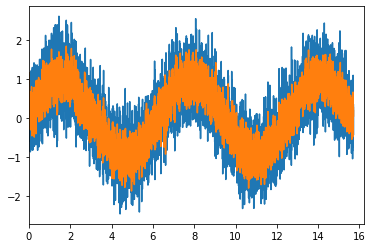

In [4]:
plt.plot(x,y)
plt.plot(x,ys2)
plt.xlim(inicio_intervalo,5*np.pi + 0.5)
plt.show()

## **- EJERCICIO 3**

**Ejercicio** Para calcular la información de una distribución de probabilidad necesitamos calcular el producto entre la información de cada posible x y su probabilidad , cada uno de estos elementos nos indica cuanta incerteza aporta cada x a la entropía de la distribución. Crea una función que calcule esto, debe recibir un vector representando a la dist. de probabilidad y devoler otro vector con el termino de entropía para cada x. Por ejemplo:

calcular_entropia([0.25,0.75])

Debe resultar en :

[0.5    ,    0.31127812]

**Nota**: la entropía es la suma sobre estos valores, en este caso no calculamos la entropía,unicamente los termimos de su sumatoria. La entropía es:

$$S = -\sum_i^nP(x_{i})log_{2}P(x_{i})$$

In [5]:
def calcular_informacion(px):
    return np.log2(px)*-1 # teoría de la información


In [6]:
# tu codigo aqui (~ 4 lineas de codigo)
def calcular_entropia(px):
    Entropia = calcular_informacion(px)*px
    return(Entropia)

In [7]:
distribucion_prob1 = [1.0]
distribucion_prob2 = [0.5,0.5] # la entropia es maxima cuando todos tienen la misma prob
distribucion_prob3 = [1.0,0.0]
distribucion_prob4 = [0.9999]
distribucion_prob5 = [0.25,0.75]
distribucion_prob6 = [0.2]*5 # ojo estas son listas por lo tanto * la replica, no son arrays de numpy
distribucion_prob7 = [0.4,0.2,0.1,0.1,0.2]

print(calcular_entropia(distribucion_prob1))
print(calcular_entropia(distribucion_prob2))
print(calcular_entropia(distribucion_prob3))
print(calcular_entropia(distribucion_prob4))
print(calcular_entropia(distribucion_prob5))
print(calcular_entropia(distribucion_prob6))
print(calcular_entropia(distribucion_prob7))

[-0.]
[0.5 0.5]
[-0. nan]
[0.00014426]
[0.5        0.31127812]
[0.46438562 0.46438562 0.46438562 0.46438562 0.46438562]
[0.52877124 0.46438562 0.33219281 0.33219281 0.46438562]


<ipython-input-5-cfaa15da8c52>:2: RuntimeWarning: divide by zero encountered in log2
  return np.log2(px)*-1 # teoría de la información
<ipython-input-6-aa1d7c620776>:3: RuntimeWarning: invalid value encountered in multiply
  Entropia = calcular_informacion(px)*px


## **- EJERCICIO 4**

**Ejercicio** : se ha determinado también que hay costos asociados a la comunicación y relación con los clientes(llamadas,mensajes electrónicos,etc) y que estos también tienen alta correlación con el monto que estos gastan en su primer més siguiendo el modelo:
$$c(x) = (x^{2} + x + log (0.0001x)-\sqrt{0.54x})/100$$

Cree una función para calcular este modelo sobre valores de de gasto de nuevos clientes , y luego cree una función  **ganancia_neta(x,g,c)** donde:
* x = vector conteniendo los valores de gasto del primer mes para nuevos clientes.
* g = función que estima la ganancia en función de x
* c = función que estima el costo en función de x

La función realiza el calculo simple **g(x) - c(x)** , ya que es posible que los modelos cambien en el tiempo es común recibir como parámetro el modelo o modelos hijos de un modelo mas grande , en este caso eso se logra recibiendo como parámetro las funciones de ganancia y costo.

In [8]:
def g(x): #<- vector
    
    ganancia = (np.power(x,3) + 2.0*(np.power(x,2.0))+np.exp(0.0001*x) - np.sqrt(2.0*x))/50
    
    return ganancia # <- vector del mismo tamaño que x

In [9]:
def c(x):
    costo = (np.power(x,2) + x + (np.log(0.0001*x))- np.sqrt(0.54*x))/100 
    return costo

In [10]:
def ganancia_neta(x,g,c):
    return g(x) - c(x)

gastos = np.array([100,50,25,100]) #vector
ganancia_neta(gastos,g,c)

array([20298.85689469,  2574.42504495,   330.9752857 , 20298.85689469])

## **- EJERCICIO 5**

**Ejercicio** Usando argmax crear una función mode(x) para calcular la moda de un vector x , esta función debe devolver una tupla de 2 elementos de la forma:

(valor,conteo)

**tip** investigar y auxiliarse de otras funciones de numpy y np.argmax, no olvidar trabajar todo vectorizado, sin ciclos.

In [11]:
x = np.array([1,8,8,2,2,2,7])
def mode(x):
    ## tu codigo aqui (~ 3 lineas de codigo):
    c = np.bincount(x)
    v = np.argmax(c)
    return (v,max(c))
    
from collections import Counter
def mode2(sample):
    c = Counter(sample)
    return c.most_common(1)[0]
        
print(mode(x))
print(mode2(x))
    


(2, 3)
(2, 3)


## **- EJERCICIO 6**

**Ejercicio** : crear una función para calcular la entropía  de una distribución de probabilidad representada como un vector.
$$S = -\sum_i^nP(x_{i})log_{2}P(x_{i})$$

**Nota**: a diferencia del ejercicio anterior donde solo calculamos los términos de la entropía, en este caso  si calculamos el valor completo de la entropía, que como mencionamos es una medida de incerteza en una distribución de probabilidad.

**recordatorio**: no usar ciclos solo operaciones vectorizadas.

In [12]:
# tu codigo aqui (~ 3 lineas de codigo)
def EntropiaSum(x):
    return np.sum(x)*-1

print(EntropiaSum(calcular_entropia(distribucion_prob5)))

-0.8112781244591328


## **- EJERCICIO 7**

**Ejercicio**: En ML usamos la entropía cruzada como una forma de medir que tan bueno es un modelo de variables discretas a través de comparar la distribución de probabilidad que el modelo produce o predice, vs la distribución de probabilidad real dada por los datos de entrenamiento.

In [13]:
def cross_entropy(Y,Y_hat):
    ##tu codigo aqui (~ 1 lineas de codigo)
    return np.sum(y * (np.log(y_hat.clip(min=0.00000001))))*-1
    
y  = np.array([1.0,0,0])
y_hat = np.array([0.7,0.2,0.1]) # <- resultado de algun modelo predictivo

cross_entropy(y,y_hat)

0.35667494393873245

## **- EJERCICIO 8**

**ejercicio** : crear una función que reciba como parámetro un vector x y calcule su magnitud o norma(euclidiana o L2) ,luego usarla para evaluar 2 vectores que representan los errores generados por 2 modelos de machine learning y concluir cual de los 2 modelos es mejor.

In [14]:
def magnitud(x):
    ## tu codigo aqui (~ 1 linea de codigo)
    return np.sqrt(np.sum(np.power(x,2))) # raiz cuadrada

errores_modelo1 = np.array([1,2,1,2]) #
errores_modelo2 = np.array([0,1,1,2]) #

m1 = magnitud(errores_modelo1)
m2 = magnitud(errores_modelo2)

# elegir el mejor modelo con una condicional(if)
print(m1, m2)
if(m1>m2):
    print('Modelo 2 es mejor')
else:
    print('Modelo 1 es mejor')

3.1622776601683795 2.449489742783178
Modelo 2 es mejor


## **- EJERCICIO 9**

**ejercicio** Usando la función del ejercicio anterior, crea otra función normalizar(x) que reciba de parámetro un vector x aplique normalización sobre este, el resultado debe ser un nuevo vector del tamaño de x cuya magnitud es igual a 1.0

In [15]:
def normalizar(x):
    ## tu codigo aqui (~ 3 linea de codigo)
    nor = x/magnitud(x)
    return nor

print(magnitud(normalizar(errores_modelo1)))
print(normalizar(errores_modelo2))

1.0
[0.         0.40824829 0.40824829 0.81649658]


## **- EJERCICIO 10**

**Ejercicio aplicado en DS**
Se tiene una red neuronal sencilla(y simplificada) como la de la siguiente imagen:
Donde:
* INPUT LAYER: un vector X de tamaño = 2 que representa los datos de entrada
* HIDDEN_LAYER :capa oculta con 2 neuronas definidas por los vectores:
    * HL1 = [0.25,0.37]
    * HL2 = [-8,14]
* OUTPUT_LAYER = capa de salida definida por el vector [4,9]

Crear una funcion neural_network(X) para calcular:
* Calcule la salida de cada neurona en la capa intermedia aplicada a la capa de entrada.
* Use el resultado del paso anterior como entrada para la neurona en la capa de salida

Asumiendo que cada neurona identifica la similitud entre su entrada y la caracteística que representa concluir:
* Para cada vector de entrada Xi , cual neurona intermedia busca la característica que mas se parece a X.
* Cual vector de entrada Xi produce una activación alta(salida alta) en la capa de salida.

In [16]:
# Aplicar la red neuronal sobre los siguientes datos X

X1 = np.array([0.50,0.72])
X2 = np.array([-4,7])
X3 = np.zeros_like(X2)
x4 = np.ones_like(X1)
X5 = np.random.randn(X1.shape[0])


## **- EJERCICIO 11**

**Ejercicio aplicado en DS**: la correlación cruzada es una medida de similitud entre 2 funciones como resultado de "desplazar" una sobre la otra, comunmente es usada para encontrar características relevantes en una función desconocida o no controlada.

En procesamiento de señales por ejemplo es usada para buscar y/o filtrar en una señal que varia en el tiempo cierta caracaterística de interés. Aveces es llamada también "sliding dot product" consiste en aplicar en cada punto de una función F el producto punto con cierta función G(comunmente mas corta) y luego "deslizar" G a un nuevo punto de la función, el resultado es una nueva función H que se interpreta como :**cuanto se parece** en cada punto la función F a la característica G. 

<img src="https://i.makeagif.com/media/11-25-2015/LZ9Ufj.gif">

En este ejercicio usamos correlación cruzada para calcular las medias moviles promediando 3 puntos que ya vimos en otro ejemplo:

El primer paso es definir la función G que define el "filtro" a aplicar, para este caso consiste simplemente en un vector con 3 elementos donde cada elemento corresponde a 1/3, luego debemos aplicar el producto punto sobre cada punto de la función o datos originales(en este ejemplo llamados x) a traves aplicar el producto punto en cada elemento "corriendolo" de uno en uno

In [17]:
ruido = 0.1*np.random.randn(15) #el ruido comunmente se debe a aleatoriedad o captura no exacta de info.
x = np.linspace(0,2*np.pi,15) 
y = np.sin(x) + ruido

filtro = np.array([1/3,1/3,1/3]) #para lograr las medias moviles a traves de correlacion cruzada

## tu codigo aqui (~ 3 linea de codigo)

    



## **- EJERCICIO 12**

**Ejercicio** dado el vector x, usar operadores lógicos sobre vectores y acceso a  elementos usando vectores booleanos , escribir un programa que calcule eun nuevo vector z conteniendo el valor absoluto de el vector x.

**nota** No se puede usar np.abs() ni ciclos

**tip** usar un vector booleano para saber que elementos son negativos y deben ser multiplicados por -1

In [18]:
x = np.linspace(-2,2,9)
print(x)

## tu codigo aqui (~ 4 linea de codigo)
### ver cuales elementos son negativos <- vector booleanos
### multiplicar esos elementos por -1
### usando el vector del rpimer paso remplazar los que eran negativos por su valor calculado en paso 2
neg = x<0
pos = x[neg]*-1
ent = x[np.logical_not(neg)]
print(np.append(pos,ent))


[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]
[2.  1.5 1.  0.5 0.  0.5 1.  1.5 2. ]


## **- EJERCICIO 13**

**ejercicio** Implementar la función:
$$h(x) = \begin{cases}0 & x< 0\\1 & 0<=x <=1\\0 & x> 1\end{cases}$$

Esta debe funcionar para vectores de cualquier tamaño x:

def h(x):

    ...

**nota** debe ser implementada sin ciclos o ifs 

In [19]:
def h(x):
    ## tu codigo aqui (~ 3 linea de codigo)
    condiciones = [x<0,x>1] #lista A 
    resultados =  [0,  0] #lista B
    return np.select(condiciones,resultados,1) 

x = np.array([0.1,-2,0.5,5])
print(h(x))

[1 0 1 0]


## **- EJERCICIO 14**

**Ejercicio**

Usando select implementar una función k(x) con la siguiente definición:
$$k(x) = \begin{cases}-x & x< 0\\x^{3}  &0<=x<1\\x^{2}  &1<=x<2\\4  &otherwise\end{cases}$$



In [20]:
x = np.array([0.1,-2,0.5,5])

condiciones = [x<0,x<1,x<2] 
resultados =  [x*-1,x**3,x**2] 

np.select(condiciones,resultados,4)

array([1.00e-03, 2.00e+00, 1.25e-01, 4.00e+00])

## **- EJERCICIO 15**

**Ejercicio** 
Investigar piecewise y:
*  Usarlo para implementar la función anterior de manera eficiente
*  Usar piscewise para implementar la función:

$$m(x) = \begin{cases}e^{2x} & x< 0\\1  &0<=x<1\\e^{1-x}  &x>=1\\\end{cases}$$

Nuevamente, sin utilizar ciclos ni ifs

In [21]:
x = np.array([0.1,-2,0.5,5])
np.piecewise(x, [x < 0, x <1, x >= 1], [lambda x:np.exp(2*x), lambda x:1, lambda x:np.exp(1-x)])

array([1.        , 1.        , 1.        , 0.01831564])

#### Investigar

* Proyección vectorial
    * Definir una función para calculo en numpy
    * interpretación
    * aplicación o caso de uso en DS u otras ciencias de tu interés: solo se necesita nombrar el caso de uso, no desarrollarlo o programarlo, tip: Hay un algoritmo de ML cuyo nombre puede ser  útil.
* Producto cruz 
    -> Operacion entre dos vectores, y su resultado es un vector perpendicular
    * calculo en numpy 
        -> En numpy se puede calcular con la funcion np.cross
    * interpretación -> Geometrica paralelogramo y paralepipedo
    * aplicación o caso de uso en DS u otras ciencias de tu interés: solo se necesita nombrar el caso de uso, no desarrollarlo o programarlo
    
#### Referencias



In [ ]:
- https://numpy.org/doc/stable/reference/generated/numpy.cross.html